# Import modules

In [22]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import os
path = os.getcwd()

<br>
<br>

# Open csv files

In [12]:
#load edges data
edges_df = pd.read_csv(f"{path}/edges_cluster_G.csv", sep=";")
edges = nx.from_pandas_edgelist(edges_df, "source", "target", edge_attr=True)

#load nodes data
nodes_df = pd.read_csv(f"{path}/nodes_cluster_G.csv", sep=";")
nodes_df.head()

,id,coord,core,gender
0,12948,0,0,0
1,8295,0,1,0
2,12924,0,0,1
3,12925,0,1,0
4,7440,1,1,0


<br>
<br>

# Create a before and after graphs

In [26]:
# Graph for before-treatment period
before_graph = nx.Graph()
before_graph.add_nodes_from(nodes_df['id']) # add all nodes to the graph
before_edges = edges_df[edges_df['pre_link'] == 1]  # filter edges with pre-link = 1
before_graph.add_edges_from(zip(before_edges['source'], before_edges['target'])) # add edges of the before-treatment period

# Graph for after-treatment period
after_graph = nx.Graph() 
after_graph.add_nodes_from(nodes_df['id']) # add all nodes to the graph
after_edges = edges_df[edges_df['post_link'] == 1]  # filter edges with post-link = 1
after_graph.add_edges_from(zip(after_edges['source'], after_edges['target'])) # add edges of the after-treatment period

<br>
<br>

# Some descriptives statistics

In [36]:
# Compute network statistics for before-treatment graph
before_edges = len(before_graph.edges())
before_avg_degree = sum(dict(before_graph.degree()).values()) / before_nodes

# Compute network statistics for after-treatment graph
after_edges = len(after_graph.edges())
after_avg_degree = sum(dict(after_graph.degree()).values()) / after_nodes

# Print network statistics
print("Number of edges:")
print(f"Before: {before_edges}")
print(f"After: {after_edges}")
print(f"Variation of {round((after_edges-before_edges)/before_edges*100,2)}%\n")

print("Average degree:")
print(f"Before: {round(before_avg_degree,2)}")
print(f"After: {round(after_avg_degree,2)}")
print(f"Variation of {round((after_avg_degree-before_avg_degree)/before_avg_degree*100,2)}%\n")

Number of edges:
Before: 1251
After: 1440
Variation of 15.11%

Average degree:
Before: 6.57
After: 7.56
Variation of 15.11%



<br>
<br>

# Some graphs

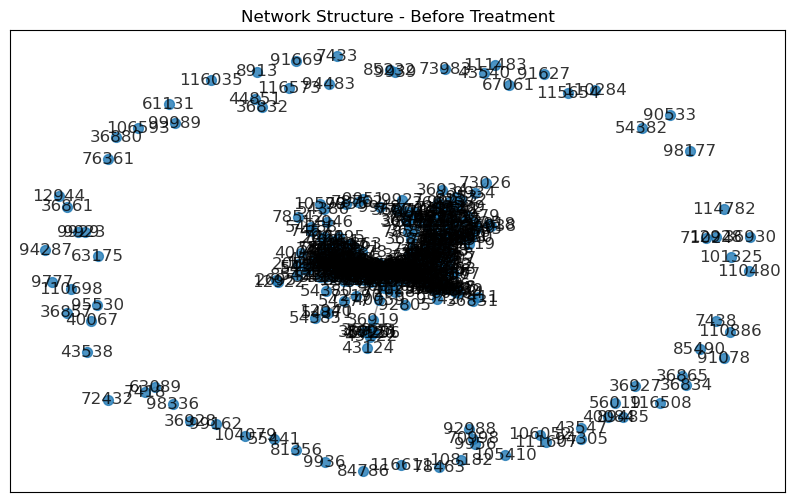

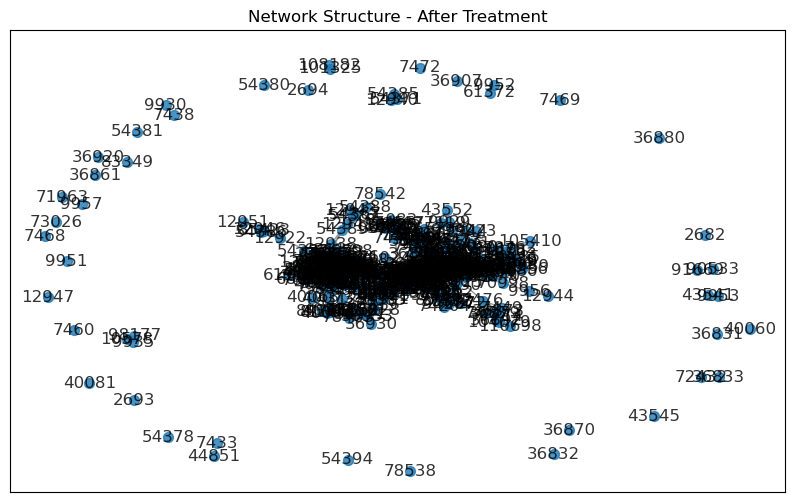

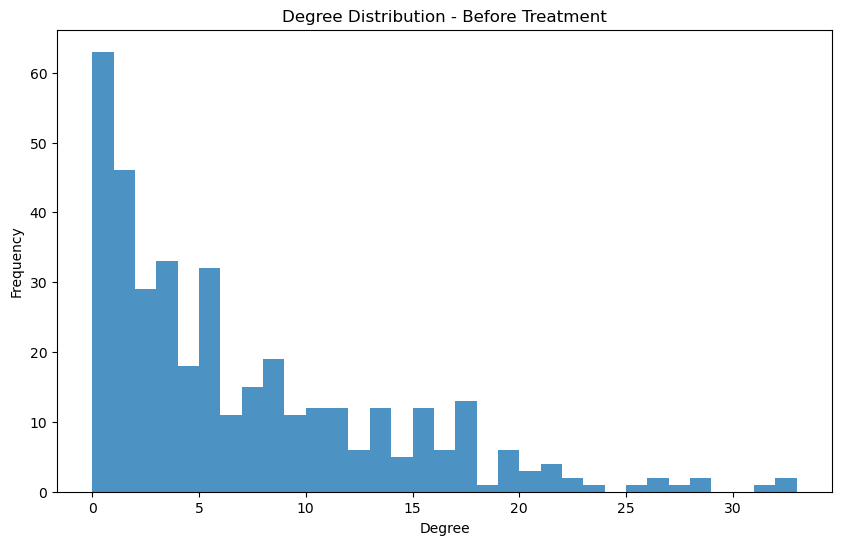

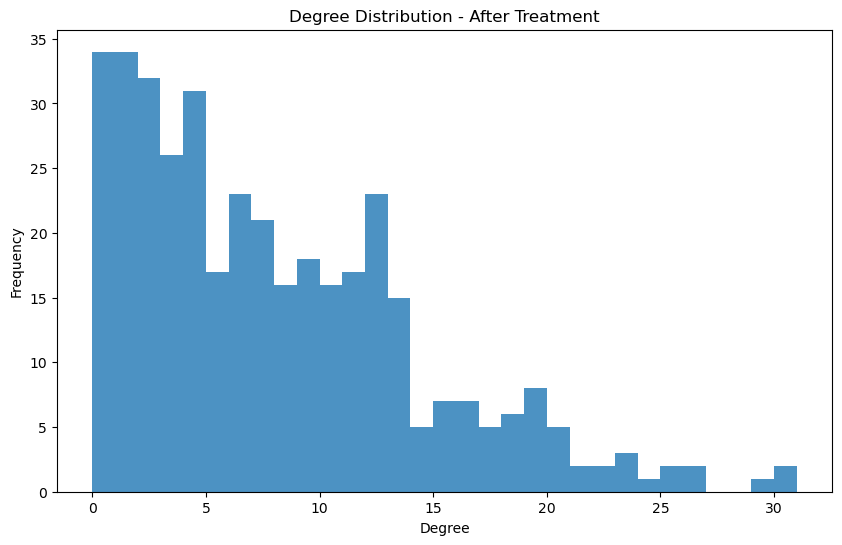

In [28]:


# Plot before-treatment graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(before_graph, node_size=50, edge_color='gray', alpha=0.8)
plt.title("Network Structure - Before Treatment")
plt.show()

# Plot after-treatment graph
plt.figure(figsize=(10, 6))
nx.draw_networkx(after_graph, node_size=50, edge_color='gray', alpha=0.8)
plt.title("Network Structure - After Treatment")
plt.show()

# Compute and plot degree distribution for before-treatment graph
before_degrees = dict(before_graph.degree()).values()
plt.figure(figsize=(10, 6))
plt.hist(list(before_degrees), bins=range(0, max(before_degrees) + 2, 1), alpha=0.8)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - Before Treatment')
plt.show()

# Compute and plot degree distribution for after-treatment graph
after_degrees = dict(after_graph.degree()).values()
plt.figure(figsize=(10, 6))
plt.hist(list(after_degrees), bins=range(0, max(after_degrees) + 2, 1), alpha=0.8)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution - After Treatment')
plt.show()

In [21]:
# Compute and print clustering coefficient for before-treatment graph
before_clustering_coefficient = nx.average_clustering(before_graph)
print(f"Clustering Coefficient - Before Treatment: {before_clustering_coefficient}")

# Compute and print clustering coefficient for after-treatment graph
after_clustering_coefficient = nx.average_clustering(after_graph)
print(f"Clustering Coefficient - After Treatment: {after_clustering_coefficient}\n")

# Compute and print assortativity coefficient for before-treatment graph
before_assortativity_coefficient = nx.degree_assortativity_coefficient(before_graph)
print(f"Assortativity Coefficient - Before Treatment: {before_assortativity_coefficient}")

# Compute and print assortativity coefficient for after-treatment graph
after_assortativity_coefficient = nx.degree_assortativity_coefficient(after_graph)
print(f"Assortativity Coefficient - After Treatment: {after_assortativity_coefficient}")

Clustering Coefficient - Before Treatment: 0.3899577553838554
Clustering Coefficient - After Treatment: 0.4629465390866179

Assortativity Coefficient - Before Treatment: 0.33574753327622114
Assortativity Coefficient - After Treatment: 0.24976211982265836
